# 1. Introduction


Nama : Dery Rai Ambhara

Batch : RMT 034

Notebook ini ditujukan untuk menganalisa dan mempredict gambar eskpresi wajah manusia yang ditampilkan menjadi 3 ekspresi senang , sedih, dan terkejut guna dari notebook ini untuk mengetahui ekspresi wajah manusia saat memasuki ruangan

# 2. Library

In [6]:
# Import libraries

import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [8]:
# Install Kaggle library in Google Collaboratory

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deryraiambhara","key":"c5240c85332afc36181eb4ab5e379394"}'}

In [10]:
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [17]:
!unzip ./facial-expressions-happiness-sadness-surprise.zip


Archive:  ./facial-expressions-happiness-sadness-surprise.zip
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (1).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (10).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (100).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (11).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (12).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (13).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (14).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (15).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (16).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (17).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (18).jpg  
  inflating: Face Expressions (Happy, Sad, Surp

In [28]:
# Define path

main_path = '/content/Face Expressions (Happy, Sad, Surprise)'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'test')

# 4. Exploratory Data Analysis

In [27]:

IMG_SIZE = 400
path = '/content/Face Expressions (Happy, Sad, Surprise)/train'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='categorical', shuffle=True) # `class_mode=categorical` for multiclass

Found 3423 images belonging to 3 classes.


terdapat 3423 gambar yang berhasil didapatkan yang kemudian dibagi menjadi 3 class

In [20]:
# Show images in pixel form

print('Images : ', data[0][0])
print('Shape  : ', data[0][0].shape)

Images :  [[[[232. 237. 241.]
   [232. 237. 241.]
   [230. 235. 238.]
   ...
   [232. 236. 239.]
   [231. 235. 238.]
   [231. 235. 238.]]

  [[232. 237. 241.]
   [232. 237. 241.]
   [230. 235. 238.]
   ...
   [232. 236. 239.]
   [231. 235. 238.]
   [231. 235. 238.]]

  [[235. 240. 244.]
   [235. 240. 244.]
   [232. 237. 240.]
   ...
   [231. 235. 238.]
   [231. 235. 238.]
   [231. 235. 238.]]

  ...

  [[237. 238. 240.]
   [237. 238. 240.]
   [237. 238. 240.]
   ...
   [236. 237. 239.]
   [236. 237. 239.]
   [236. 237. 239.]]

  [[237. 238. 240.]
   [237. 238. 240.]
   [237. 238. 240.]
   ...
   [236. 237. 239.]
   [236. 237. 239.]
   [236. 237. 239.]]

  [[237. 238. 240.]
   [237. 238. 240.]
   [237. 238. 240.]
   ...
   [236. 237. 239.]
   [236. 237. 239.]
   [236. 237. 239.]]]


 [[[ 28.  21.  13.]
   [ 28.  21.  13.]
   [ 28.  21.  13.]
   ...
   [ 52.  45.  39.]
   [ 52.  45.  39.]
   [ 52.  45.  39.]]

  [[ 28.  21.  13.]
   [ 28.  21.  13.]
   [ 28.  21.  13.]
   ...
   [ 52.  4

bentuk ukuran gambar menjadi Shape  :  (32, 400, 400, 3)

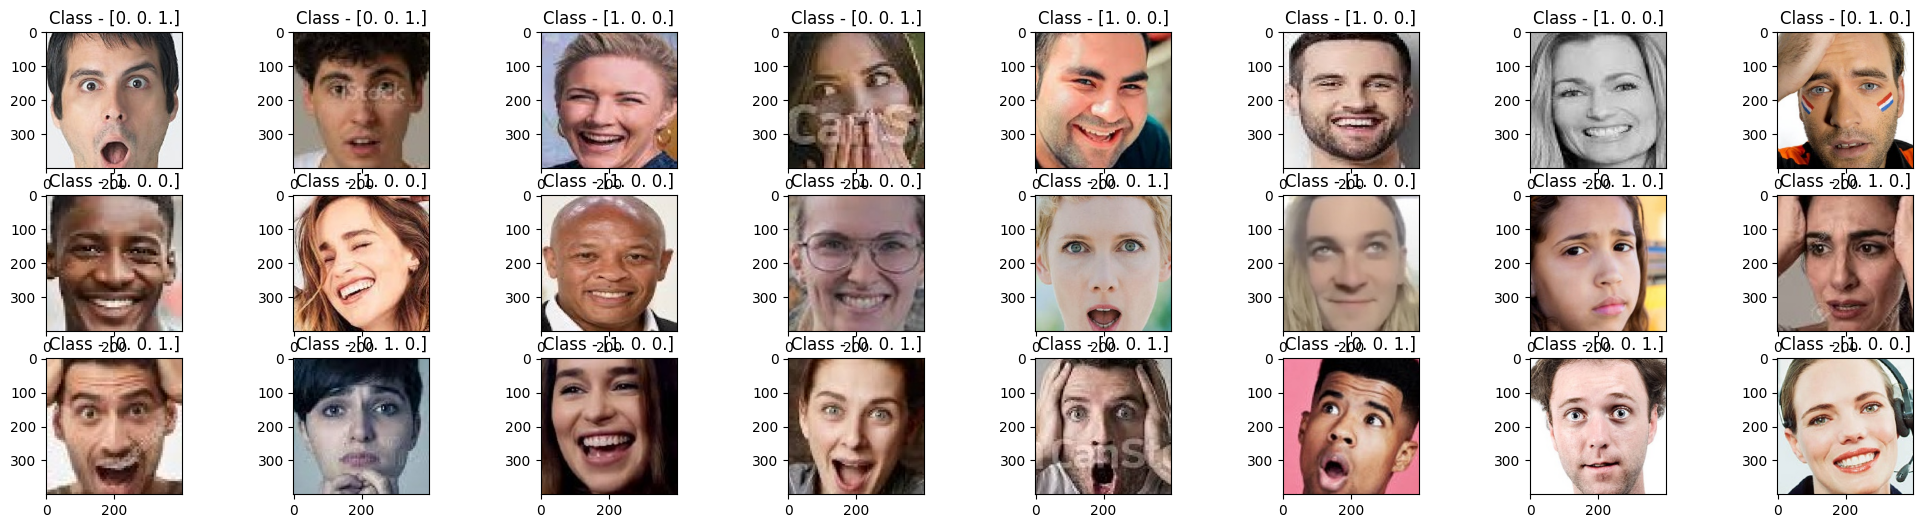

In [22]:
# Show each of image from both categories

fig, ax = plt.subplots(nrows=3, ncols=8, figsize=(25,6))
n = 0

for i in range(3):
  for j in range(8):
    img = data[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(data[0][1][n]))
    n += 1

untuk ekspresi wajah manusia yang senang kebanyakan ditunjukan dengan terlihatnya gigi atau mulut yang terbuka

untuk ekspresi wajah manusia yang sedih kebanyakan ditunjukan dengan menyempiotnya mata ditambah dengan tertutupnya mulut

untuk ekspresi wajah manusia yang terkejut kebanyakan ditunjukan dengan melebarnya mata atau melotot

# 5. Feature Engineering

In [23]:
# Define hyperparameters

img_height= 250
img_width= 250
batch_size= 64

In [30]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.4)

train_set = train_datagen.flow_from_directory(path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            subset='validation',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 2055 images belonging to 3 classes.
Found 1368 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


membagi data menjadi train dan val
jumlah data train 2055 dan jumlah data val 1368

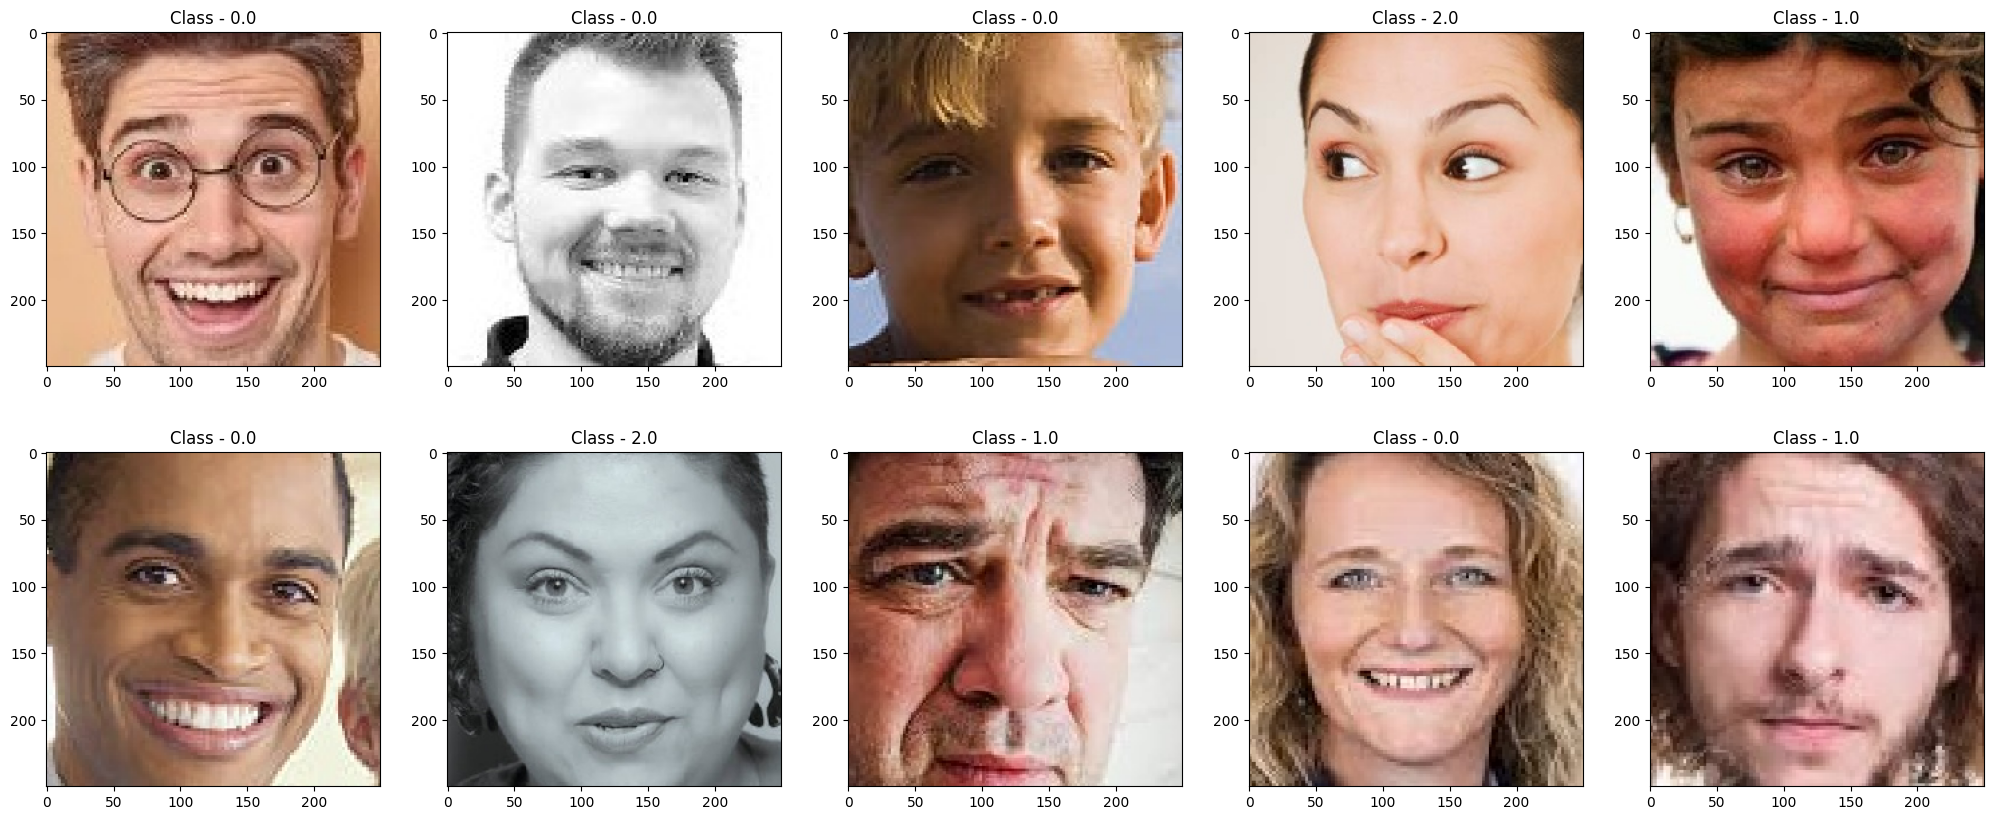

In [31]:
# Show images of train-set

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
n = 0

for i in range(2):
  for j in range(5):
    img = train_set[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(train_set[0][1][n]))
    n += 1

gambar gambar yang didapat di train set

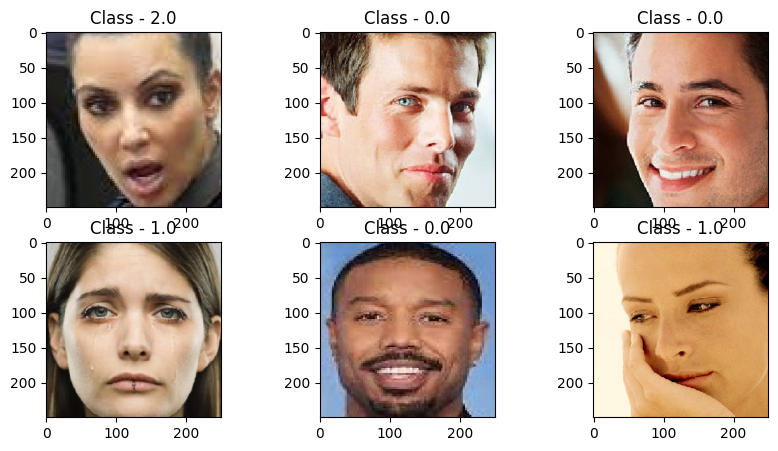

In [32]:
# Show images of val-set

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
n = 0

for i in range(2):
  for j in range(3):
    img = val_set[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(val_set[0][1][n]))
    n += 1

gambar gambar yang terdapat di val set

In [33]:
# Show labels

train_set.class_indices

{'happy': 0, 'sad': 1, 'surprise': 2}

penunjukan class class

# 6. ANN Training

## 6.1 Model Definition

In [34]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [35]:
# Create Sequential API model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      55,116,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,211,075 (210.61 MB)

 Trainable params: 55,211,075 (210.61 MB)

 Non-trainable params: 0 (0.00 B)

terdapat total paramater berjumlah 55,212,075

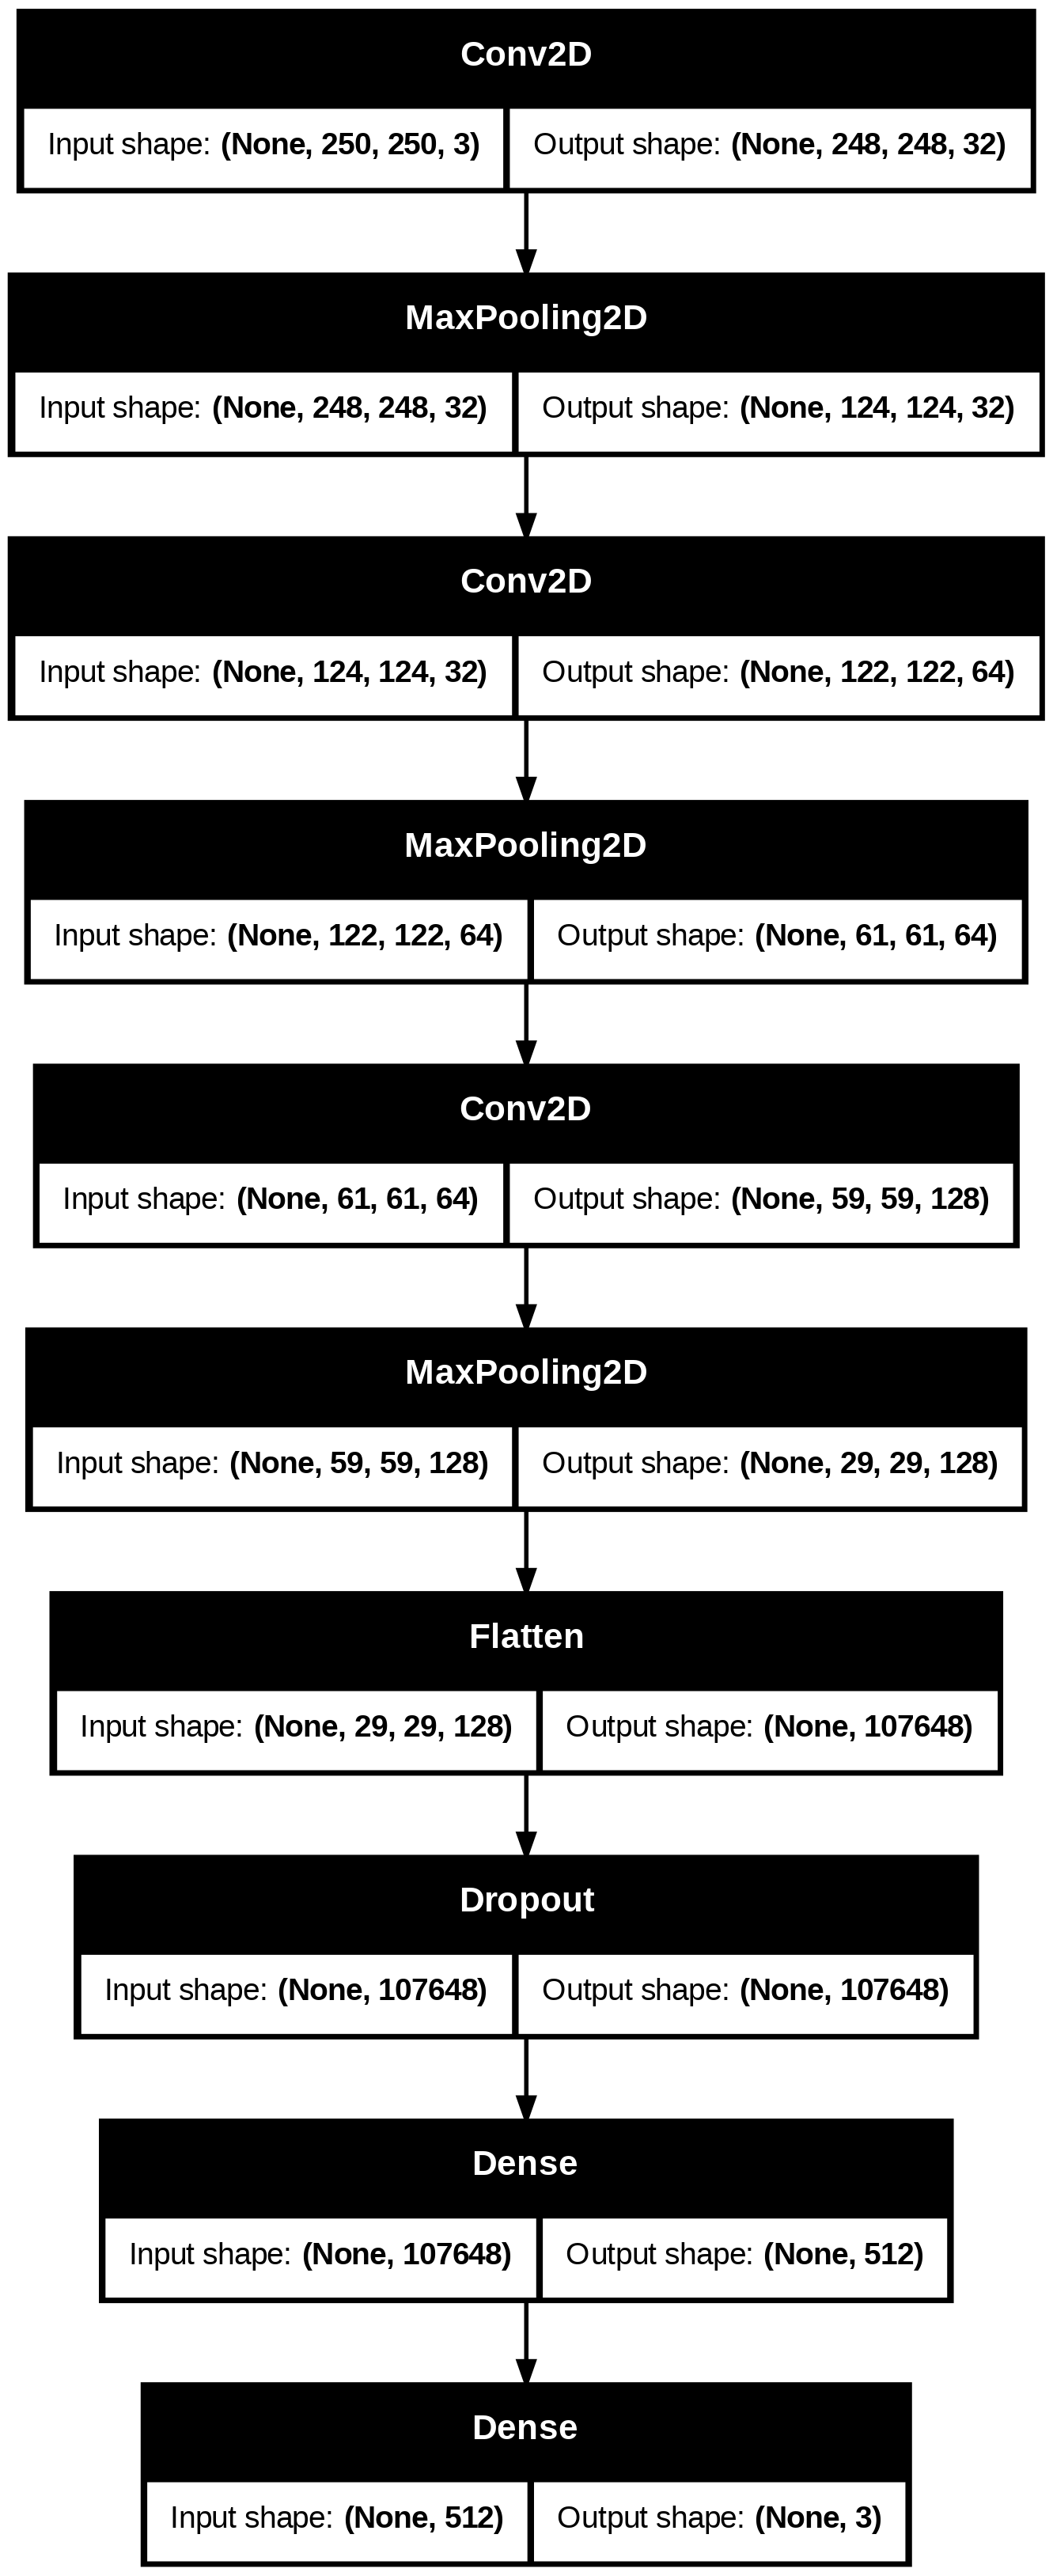

In [36]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

## 6.2 Model Training

In [ ]:
# Train the model

%%time
history = model.fit(train_set, epochs=20, validation_data=val_set, batch_size=batch_size)

Epoch 1/20
11/33 ━━━━━━━━━━━━━━━━━━━━ 3:57 11s/step - accuracy: 0.3111 - loss: 1432.1572

## 6.3 Model Evaluation

In [ ]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [ ]:
# Get the probability predictions
y_pred_prob = model.predict(test_set)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Assuming test_set.classes contains the true labels
print(classification_report(test_set.classes, y_pred_class, target_names=test_set.class_indices.keys()))


dari hasil model training data masih overfit dengan loss dan val loss pada epoch 20 lossnya 0.07 sedangkan val loss nya 1.19 ini dikarnakan data belum dilakukan augmentation

# 7. ANN improvement

## 7.1 Improvement with augmentation

### 7.1.1 Model Definition

In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.05,
                                                                    width_shift_range=0.05,
                                                                    height_shift_range=0.05,
                                                                    shear_range=0.05,
                                                                    horizontal_flip=True,
                                                                    validation_split=0.4)

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      class_mode='sparse',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

In [ ]:
# Create Sequential API model

model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(128, (3,3),activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Flatten())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dense(3, activation='softmax'))

# Compile
model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_aug.summary()

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_aug, show_shapes=True)

### 7.1.2 Model Training

In [ ]:
# Train the model

%%time
history_aug = model_aug.fit(train_set_aug, epochs=20, validation_data=val_set_aug, batch_size=batch_size)

### 7.1.3 Model Evaluation

In [ ]:
# Plot training results

history_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [ ]:
# Get the probability predictions
y_pred_prob = model_aug.predict(test_set)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Assuming test_set.classes contains the true labels
print(classification_report(test_set.classes, y_pred_class, target_names=test_set.class_indices.keys()))

## 8.1 Improvement with Transfer Learning

### 8.1.1 Model Definition

In [ ]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 64

In [ ]:

from keras.applications.vgg16 import VGG16, preprocess_input

pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.05,
                                                                   width_shift_range=0.05,
                                                                   height_shift_range=0.05,
                                                                   shear_range=0.05,
                                                                   horizontal_flip=True,
                                                                   validation_split=0.4,
                                                                   preprocessing_function=preprocess_input)

train_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

val_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  subset='validation',
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=2)

test_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl = test_datagen_tl.flow_from_directory(test_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=2)